In [1]:
!tar -xzvf "/content/drive/MyDrive/네이버 부스트캠프/STS_Competition/data.tar.gz"

._.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
./
./._test.csv
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
./test.csv
./._dev.csv
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
./dev.csv
./._train.csv
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
./train.csv
./._sample_submission.csv
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
./sample_submission.csv


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 4.1 MB/s 
     |████████████████████████████████| 163 kB 48.5 MB/s 
     |████████████████████████████████| 7.6 MB 37.4 MB/s 


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

/opt/conda/envs/sts/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 사용자 함수 정의

In [21]:
# 입력의 두 문장을 토크나이징하여 길이와 unk 토큰의 개수를 분석합니다
def tokenizing(df):
    tokenizer = AutoTokenizer.from_pretrained('klue/roberta-small')

    sentence1_len = []
    sentence2_len = []
    sentence1_unk = []
    sentence2_unk = []
    for i, item in df.iterrows():
        sentence1 = tokenizer(item['sentence_1'])['input_ids']
        sentence2 = tokenizer(item['sentence_2'])['input_ids']

        sentence1_len.append(len(sentence1))
        sentence2_len.append(len(sentence2))

        sentence1_unk.append(sentence1.count(tokenizer.unk_token_id))
        sentence2_unk.append(sentence2.count(tokenizer.unk_token_id))

    tokenized_df = pd.DataFrame([sentence1_len, sentence2_len, sentence1_unk, sentence2_unk]).transpose()
    tokenized_df.columns = ['1_len', '2_len', '1_unk', '2_unk']
    print(tokenized_df.describe())

In [13]:
# label의 분포를 box plot으로 그립니다
def draw_box_plot(df):
    label_list = [row['label'] for i, row in df.iterrows()]

    plt.boxplot(label_list)
    plt.title("Boxplot for target label")
    plt.show()

In [38]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    for i, item in df.iterrows():
        source_binary[item['source']][int(item['binary-label'])] += 1
    source_binary_df = pd.DataFrame(source_binary).transpose()

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # source별 binary label의 분포
    source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # label의 분포
    df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    plt.show()
    # binary label의 분포
    df['binary-label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()

# 데이터 분석

In [6]:
# 데이터 읽기
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
sub_df = pd.read_csv("/content/sample_submission.csv")

In [10]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [11]:
test_df.head()

,id,source,sentence_1,sentence_2
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요
2,boostcamp-sts-v1-test-002,petition-rtt,기무사 영관급의 하극상 정말 이대로 방관하는게 민주주의 인지요,그냥 가만히 있는게 진짜 민주주의인가요?
3,boostcamp-sts-v1-test-003,nsmc-sampled,화까지가 한계였다.,기대가 너무 컸다...
4,boostcamp-sts-v1-test-004,slack-rtt,왜 혼자 있지.. ㅠㅠ,왜 혼자야.. ㅠㅠ


In [9]:
sub_df.head()

,id,target
0,boostcamp-sts-v1-test-000,3.5
1,boostcamp-sts-v1-test-001,2.1
2,boostcamp-sts-v1-test-002,2.3
3,boostcamp-sts-v1-test-003,1.0
4,boostcamp-sts-v1-test-004,4.0


In [18]:
# label과 binary label 통계 분석
print(train_df.describe())

             label  binary-label
count  9324.000000   9324.000000
mean      1.849968      0.389532
std       1.602212      0.487670
min       0.000000      0.000000
25%       0.200000      0.000000
50%       1.600000      0.000000
75%       3.400000      1.000000
max       5.000000      1.000000


train


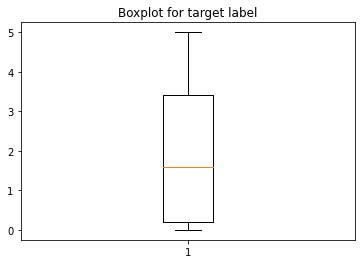

In [17]:
# label 분포 확인
print("train")
draw_box_plot(train_df)

In [22]:
# 토크나이징 결과 분석
print("train")
tokenizing(train_df)

train
             1_len        2_len        1_unk        2_unk
count  9324.000000  9324.000000  9324.000000  9324.000000
mean     14.848241    14.958387     0.028958     0.022308
std       7.771558     7.201888     0.179438     0.156163
min       3.000000     3.000000     0.000000     0.000000
25%      10.000000    10.000000     0.000000     0.000000
50%      13.000000    13.000000     0.000000     0.000000
75%      17.000000    18.000000     0.000000     0.000000
max      88.000000    84.000000     4.000000     2.000000


In [23]:
# source 종류 파악
print(f"train source unique : {sorted(train_df['source'].unique())}")

train source unique : ['nsmc-rtt', 'nsmc-sampled', 'petition-rtt', 'petition-sampled', 'slack-rtt', 'slack-sampled']


In [ ]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    for i, item in df.iterrows():
        source_binary[item['source']][item['binary-label']] += 1
    source_binary_df = pd.DataFrame(source_binary).transpose()

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # source별 binary label의 분포
    source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # label의 분포
    df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    plt.show()
    # binary label의 분포
    df['binary_label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()

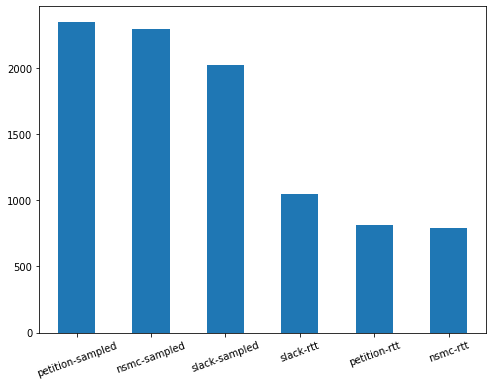

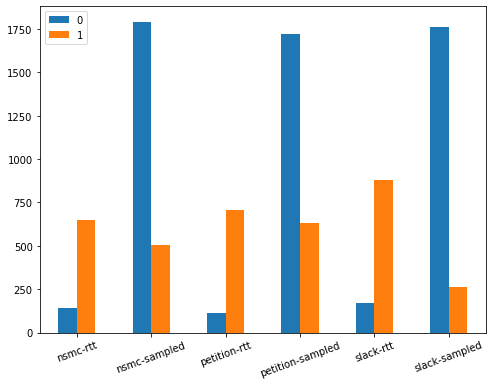

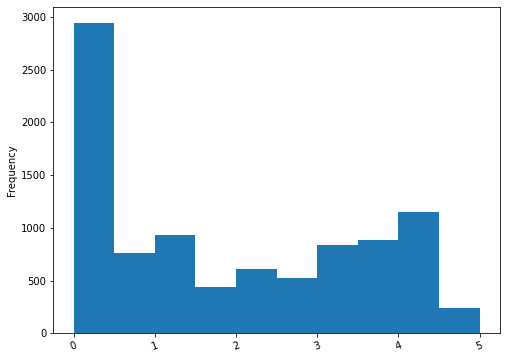

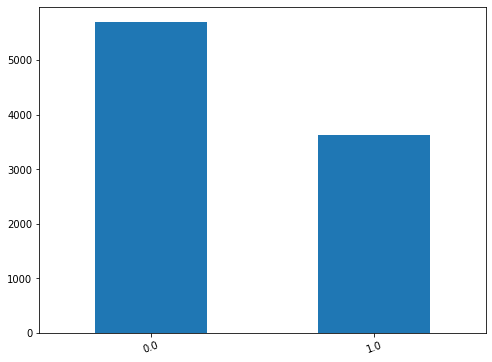

In [39]:
draw_graph(train_df)

# Back Translation + Copied Translation

## Back Translation

In [3]:
import pandas as pd
import os

os.chdir("/opt/ml")

In [7]:
df = pd.read_csv("/opt/ml/data/train.csv")
print(df.shape)
df.head()

(9324, 6)


,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [10]:
df.iloc[:,:2]

,id,source
0,boostcamp-sts-v1-train-000,nsmc-sampled
1,boostcamp-sts-v1-train-001,slack-rtt
2,boostcamp-sts-v1-train-002,petition-sampled
3,boostcamp-sts-v1-train-003,slack-sampled
4,boostcamp-sts-v1-train-004,slack-sampled
...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled
9320,boostcamp-sts-v1-train-9320,petition-sampled
9321,boostcamp-sts-v1-train-9321,petition-sampled
9322,boostcamp-sts-v1-train-9322,slack-sampled


In [11]:
df.iloc[:,-2:]

,label,binary-label
0,2.2,0.0
1,4.2,1.0
2,2.4,0.0
3,3.0,1.0
4,0.0,0.0
...,...,...
9319,0.2,0.0
9320,4.2,1.0
9321,0.6,0.0
9322,3.2,1.0


In [8]:
s1 = pd.read_csv("/opt/ml/data/train_data_pororo_sent1.csv")
print(s1.shape)
s1.head()

(9324, 1)


,sentence_1
0,"스릴링, 반전, 다른 어떤 한국 영화 쓰레기와도 다르다."
1,"아, 저는 접근권이 없다고 합니다."
2,주택 신청 조건을 바꿔라
3,입사 후 처음으로 만나서 반가웠다.
4,자존심이 가득해!


In [9]:
s2 = pd.read_csv("/opt/ml/data/train_data_pororo_sent2.csv")
print(s2.shape)
s2.head()

(9324, 1)


,sentence_2
0,"반전, 사랑, 재미가 있다"
1,"아, 난 접근권이 없어."
2,주택 청약이 없는 기준을 변경한다
3,영상만으로도 실생활에서 보니 정말 반가웠다.
4,"사실, 너를 한 번 봤어!"


In [6]:
df.concat()

(9324, 1)

In [19]:
b_df = pd.concat([df.iloc[:,:2],s1,s2,df.iloc[:,-2:]], axis=1)
b_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,"스릴링, 반전, 다른 어떤 한국 영화 쓰레기와도 다르다.","반전, 사랑, 재미가 있다",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,"아, 저는 접근권이 없다고 합니다.","아, 난 접근권이 없어.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 신청 조건을 바꿔라,주택 청약이 없는 기준을 변경한다,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음으로 만나서 반가웠다.,영상만으로도 실생활에서 보니 정말 반가웠다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,자존심이 가득해!,"사실, 너를 한 번 봤어!",0.0,0.0


In [20]:
b_df.sample(frac=0.5, random_state=100)

,id,source,sentence_1,sentence_2,label,binary-label
1621,boostcamp-sts-v1-train-1621,nsmc-rtt,그 대본과 시나리오에 대해 죄송합니다,그 시나리오를 쓴 사람에게 미안하다,2.0,0.0
7131,boostcamp-sts-v1-train-7131,nsmc-sampled,두려움이나 긴장은 전혀 없다,긴장감이 별로 없다,3.0,1.0
2671,boostcamp-sts-v1-train-2671,petition-sampled,조두순의 석방에 대한 청원,조두순의 석방에 반대하는 청원이 나왔다.,4.2,1.0
2917,boostcamp-sts-v1-train-2917,slack-rtt,오늘부터 하루 식사를 할 거야 가! 가!,이는 오늘부터 하루밖에 안 남았다 가! 가!,1.6,0.0
3331,boostcamp-sts-v1-train-3331,petition-rtt,스포츠 홍보 투표권과 문화체육관광부 진상규명 등을 위한 청원서,문화체육관광부에서 스포츠 홍보 투표권 침해 청원과 사보타 주에 대한 조사,1.8,0.0
...,...,...,...,...,...,...
2052,boostcamp-sts-v1-train-2052,nsmc-sampled,프랑스 영화를 방해하는 영화,적어도 재미있는 영화,2.4,0.0
3345,boostcamp-sts-v1-train-3345,nsmc-rtt,"이러한 고대,복고기능 촬영 기법이 만들어낸 전통적인 한국 에로티즘을 벗어나 유로 영...",이런 고풍스럽고 복고적인 촬영 기법으로 만들어진 한국의 전통적인 에로티즘은 유로 영...,3.6,1.0
4070,boostcamp-sts-v1-train-4070,petition-sampled,중학생 7시간,5월 10일 한 부모의 날,0.0,0.0
6576,boostcamp-sts-v1-train-6576,slack-sampled,금요일 잘 보내세요!,진차의 귀여운 아이와 일주일을 시작해!,0.0,0.0


In [22]:
b05_df = pd.concat([df,b_df.sample(frac=0.5, random_state=100)], axis=0)
b05_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
2052,boostcamp-sts-v1-train-2052,nsmc-sampled,프랑스 영화를 방해하는 영화,적어도 재미있는 영화,2.4,0.0
3345,boostcamp-sts-v1-train-3345,nsmc-rtt,"이러한 고대,복고기능 촬영 기법이 만들어낸 전통적인 한국 에로티즘을 벗어나 유로 영...",이런 고풍스럽고 복고적인 촬영 기법으로 만들어진 한국의 전통적인 에로티즘은 유로 영...,3.6,1.0
4070,boostcamp-sts-v1-train-4070,petition-sampled,중학생 7시간,5월 10일 한 부모의 날,0.0,0.0
6576,boostcamp-sts-v1-train-6576,slack-sampled,금요일 잘 보내세요!,진차의 귀여운 아이와 일주일을 시작해!,0.0,0.0


In [24]:
b05_df.iloc[9324:,:]

,id,source,sentence_1,sentence_2,label,binary-label
1621,boostcamp-sts-v1-train-1621,nsmc-rtt,그 대본과 시나리오에 대해 죄송합니다,그 시나리오를 쓴 사람에게 미안하다,2.0,0.0
7131,boostcamp-sts-v1-train-7131,nsmc-sampled,두려움이나 긴장은 전혀 없다,긴장감이 별로 없다,3.0,1.0
2671,boostcamp-sts-v1-train-2671,petition-sampled,조두순의 석방에 대한 청원,조두순의 석방에 반대하는 청원이 나왔다.,4.2,1.0
2917,boostcamp-sts-v1-train-2917,slack-rtt,오늘부터 하루 식사를 할 거야 가! 가!,이는 오늘부터 하루밖에 안 남았다 가! 가!,1.6,0.0
3331,boostcamp-sts-v1-train-3331,petition-rtt,스포츠 홍보 투표권과 문화체육관광부 진상규명 등을 위한 청원서,문화체육관광부에서 스포츠 홍보 투표권 침해 청원과 사보타 주에 대한 조사,1.8,0.0
...,...,...,...,...,...,...
2052,boostcamp-sts-v1-train-2052,nsmc-sampled,프랑스 영화를 방해하는 영화,적어도 재미있는 영화,2.4,0.0
3345,boostcamp-sts-v1-train-3345,nsmc-rtt,"이러한 고대,복고기능 촬영 기법이 만들어낸 전통적인 한국 에로티즘을 벗어나 유로 영...",이런 고풍스럽고 복고적인 촬영 기법으로 만들어진 한국의 전통적인 에로티즘은 유로 영...,3.6,1.0
4070,boostcamp-sts-v1-train-4070,petition-sampled,중학생 7시간,5월 10일 한 부모의 날,0.0,0.0
6576,boostcamp-sts-v1-train-6576,slack-sampled,금요일 잘 보내세요!,진차의 귀여운 아이와 일주일을 시작해!,0.0,0.0


In [29]:
address = '/opt/ml/data/'

In [34]:
b05_df.to_csv(path_or_buf=address+'b05_df.csv', index=False)

In [37]:
b033_df = pd.concat([df,b_df.sample(frac=0.33, random_state=100)], axis=0)
b033_df.to_csv(path_or_buf=address+'b033_df.csv', index=False)

In [40]:
b025_df = pd.concat([df,b_df.sample(frac=0.25, random_state=100)], axis=0)
b025_df.to_csv(path_or_buf=address+'b025_df.csv', index=False)
b066_df = pd.concat([df,b_df.sample(frac=0.66, random_state=100)], axis=0)
b066_df.to_csv(path_or_buf=address+'b066_df.csv', index=False)
b075_df = pd.concat([df,b_df.sample(frac=0.75, random_state=100)], axis=0)
b075_df.to_csv(path_or_buf=address+'b075_df.csv', index=False)